# Unsupervised Machine Learning

### Part 1

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
# Read `myopia.csv` into a Pandas DataFrame.

file_path = ("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [6]:
# Remove the "MYOPIC" column from the dataset.
myopia_data = df_myopia.drop(['MYOPIC'], axis=1)
# myopia_data.head()

In [10]:
# Get the shape (number of columns and rows) of the DataFrame
myopia_data.shape

(618, 14)

In [11]:
# Get the column names
myopia_data.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [14]:
# Find out if there are any duplicated rows
myopia_data.duplicated().sum()

0

In [13]:
# Find out if there are any missing/null values
myopia_data.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [15]:
# Statistical summary
myopia_data.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


In [24]:
# Save the cleaned dataframe as a new csv file for future analysis
file_path = Path('cleaned_myopia.csv')
myopia_data.to_csv(file_path, index=False)

In [25]:
#Standardize your dataset into smaller values.
scaler = StandardScaler()

X_scaled = scaler.fit_transform(myopia_data)


In [26]:
# There are 14 dimensions (features/columns) in the Myopia Datasets 
X_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

### Part 2

In [28]:
# Perform dimensionality reduction with PCA at n_components=0.90 (preserving 90% explained variance)
pca = PCA(n_components=0.90)

# Get the principal components for the X_train_scaled
pca_data = pca.fit_transform(X_scaled)

# pca_transformed_data variance to detect the importance of components. Principle component 1 and 2 
pca.explained_variance_ratio_.sum()

0.9187361702915188

In [36]:
# Run t-SNE to further reduce dataset
tsne = TSNE(learning_rate=150, n_components=3)

t_features = tsne.fit_transform(pca_data)

In [37]:
# Check that dimensions have been reduced to two
t_features.shape

(618, 3)

In [38]:
myopia_data["X"] = t_features[:,0]
myopia_data["y"] = t_features[:,1]
myopia_data["Myopic"] = df_myopia["MYOPIC"]
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,16.861597,-17.875719,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,41.735039,18.876175,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-31.717609,-9.045115,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,20.425251,-14.801656,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-6.989544,36.910374,0


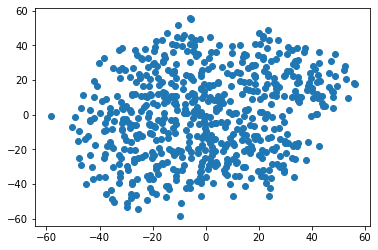

In [39]:
plt.scatter(myopia_data["X"], myopia_data["y"])
plt.show()

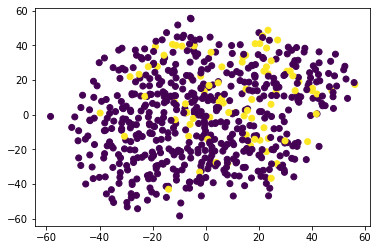

In [40]:
plt.scatter(myopia_data["X"], myopia_data["y"], c=myopia_data["Myopic"])
plt.show()

In [41]:
labels = myopia_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

### Part 3 

In [43]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)



C:\Users\VAIO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


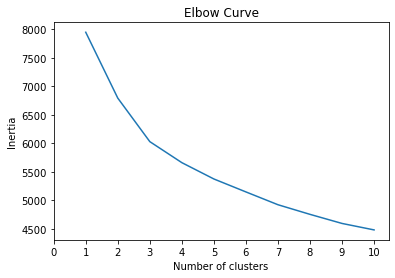

In [44]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [57]:
def get_clusters(df_myopia_pca):
    
    # Initialize the K-Means model
    model = KMeans(n_clusters=3, random_state=0)

    # Train the model
    model.fit(pca_data)

    # Predict clusters
    predictions = model.predict(pca_data)

    # Create return DataFrame pca_data predicted clusters
    pca_data["myopic"] = model.labels_

    return pca_data

In [58]:
pca_data["myopic"] = model.labels_
pca_data.head()

NameError: name 'model' is not defined